In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import geopandas as gpd
sns.set_theme()

## Upload the datasets
Quick Dataset Overview

In [3]:
demo=pd.read_csv("C:\\Users\ALIN\Desktop\Python_Alin\EDA project\pandas_project\demographics_de.csv")
print(demo.shape)
demo.head()

(192, 4)


,state,gender,age_group,population
0,Baden-Wuerttemberg,female,00-04,261674
1,Baden-Wuerttemberg,female,05-14,490822
2,Baden-Wuerttemberg,female,15-34,1293488
3,Baden-Wuerttemberg,female,35-59,1919649
4,Baden-Wuerttemberg,female,60-79,1182736


In [21]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state       192 non-null    object
 1   gender      192 non-null    object
 2   age_group   192 non-null    object
 3   population  192 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.1+ KB


In [ ]:
demo.nunique()

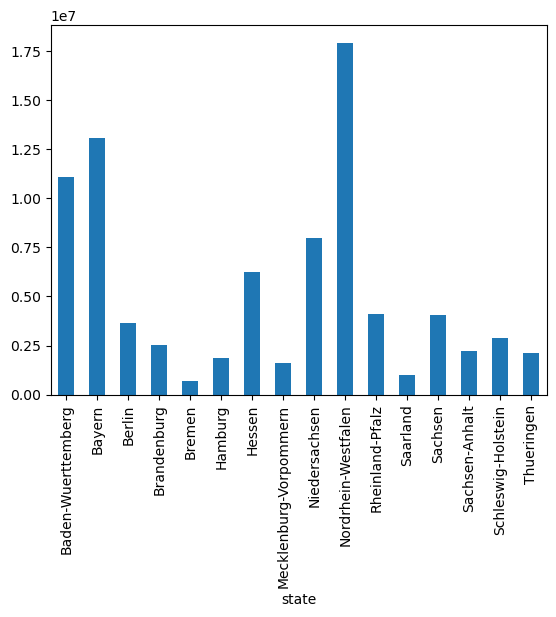

In [24]:
covid=pd.read_csv("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\covid_de.csv",parse_dates = ['date'], index_col="date")
print(covid.shape)
covid.sample(7)

(2790555, 7)


,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2022-02-07,Hessen,SK Darmstadt,00-04,F,2,0,2
2021-10-17,Thueringen,LK Saale-Holzland-Kreis,05-14,F,1,0,1
2022-07-26,Baden-Wuerttemberg,LK Loerrach,60-79,M,27,0,27
2020-03-27,Bayern,SK Wuerzburg,60-79,M,1,0,1
2022-07-13,Rheinland-Pfalz,SK Mainz,15-34,M,79,0,79
2022-08-10,Saarland,LK Saarlouis,05-14,M,2,0,2
2020-12-07,Nordrhein-Westfalen,LK Rhein-Erft-Kreis,80-99,M,2,2,0


In [8]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2890909 entries, 2020-03-27 to 2022-08-24
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   state      object
 1   county     object
 2   age_group  object
 3   gender     object
 4   cases      int64 
 5   deaths     int64 
 6   recovered  int64 
dtypes: int64(3), object(4)
memory usage: 176.4+ MB


In [ ]:
covid.nunique()

In [ ]:
covid.describe()

In [ ]:
#Using boxplots to identify outliers within numeric data
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = covid.boxplot()
fig.tight_layout()

In [21]:
vaccines=pd.read_csv("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\covid_de_vaccines.csv",parse_dates = ['date'],index_col="date")
print(vaccines.shape)
vaccines.head(7)

(757, 8)


,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul
date,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0
2020-12-28,18073,18073,0,42489,9,2,42500,0
2020-12-29,50229,50229,0,92717,9,3,92729,0
2020-12-30,64213,64213,0,156929,10,3,156942,0
2020-12-31,49985,49985,0,206912,12,3,206927,0
2021-01-01,25723,25723,0,232614,27,7,232650,0
2021-01-02,47835,47835,0,280446,28,7,280485,0


In [ ]:
vaccines.info()

In [ ]:
vaccines.nunique()

In [ ]:
vaccines.hist(figsize=(10,7))
plt.tight_layout()
plt.show()

In [ ]:
#Using boxplots to identify outliers within numeric data
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = vaccines.boxplot()
fig.tight_layout()
# astrazeneca_cumul & persons_first_cumul have outliers

## Identify Missing Data

In [6]:
print(demo.isnull().sum())
print(covid.isnull().sum())
print(vaccines.isnull().sum())

state         0
gender        0
age_group     0
population    0
dtype: int64
state             0
county            0
age_group     13876
gender       125625
cases             0
deaths            0
recovered         0
dtype: int64
doses                  0
doses_first            0
doses_second           0
pfizer_cumul           0
moderna_cumul          0
astrazeneca_cumul      0
persons_first_cumul    0
persons_full_cumul     0
dtype: int64


In [7]:
#rows that miss both age_group and gender
covid[covid.age_group.isnull() &covid.gender.isnull()]

,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2022-02-18,Baden-Wuerttemberg,LK Alb-Donau-Kreis,NaN,NaN,1,0,1
2022-01-19,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-20,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-25,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-31,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...
2021-03-24,Thueringen,LK Sonneberg,NaN,NaN,2,0,2
2021-11-24,Thueringen,LK Unstrut-Hainich-Kreis,NaN,NaN,1,0,1
2022-12-20,Thueringen,SK Jena,NaN,NaN,1,0,1


In [14]:
#Percentage of missing age data out of all

print(f'In age_group {len(covid[covid.age_group.isnull()])*100/len(covid)}% of values are missing')

In age_group 0.47998743647759234% of values are missing


In [15]:
#Percentage of missing gender data out of all
print(f'In gender {len(covid[covid.gender.isnull()])*100/len(covid)}% of values are missing')

In gender 4.34551900457607% of values are missing


## Demographic parameters

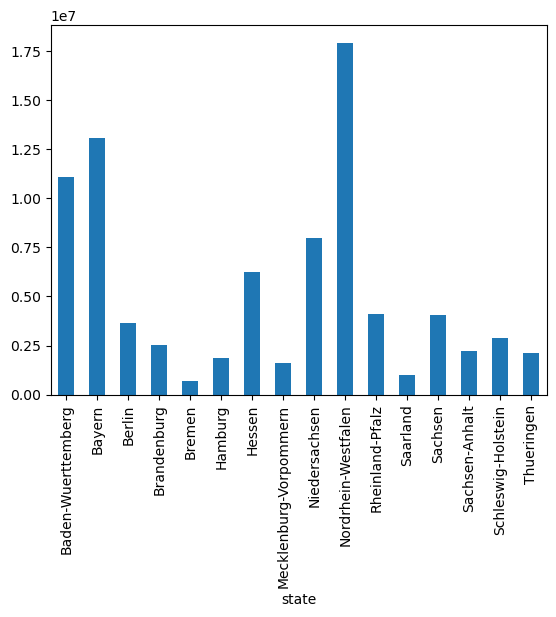

In [49]:
#population by state
demo.groupby('state')['population'].sum().plot.bar()
plt.show()

<AxesSubplot:xlabel='state'>

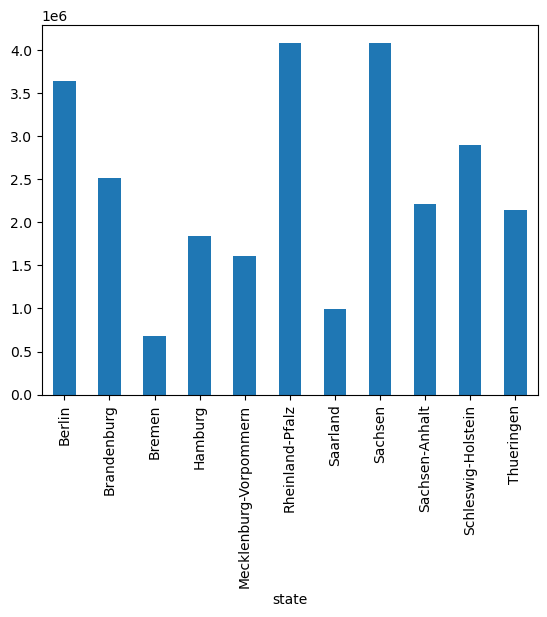

In [56]:
#divide the states to small and large by population
small=demo.groupby('state').filter(lambda grp:grp['population'].sum()<5000000)
large=demo.groupby('state').filter(lambda grp:grp['population'].sum()>5000000)
small.groupby('state')['population'].sum().plot.bar()

<AxesSubplot:xlabel='state'>

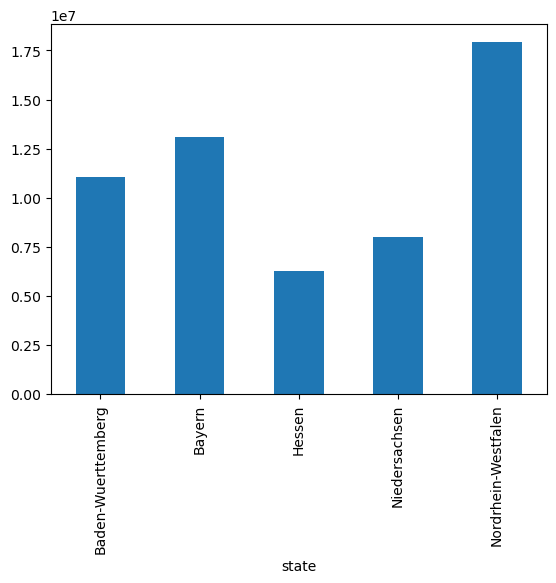

In [57]:
large.groupby('state')['population'].sum().plot.bar()

<AxesSubplot:xlabel='state'>

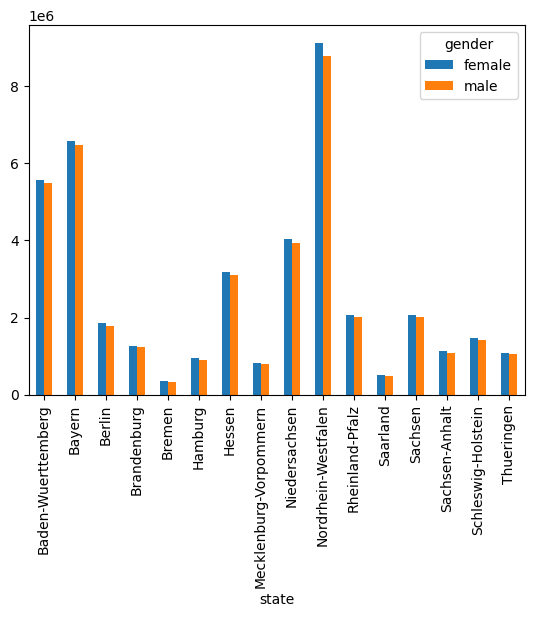

In [18]:
#number of male/ female by state
demo.pivot_table(index='state', columns='gender',values='population', aggfunc='sum').plot.bar()

<AxesSubplot:xlabel='state'>

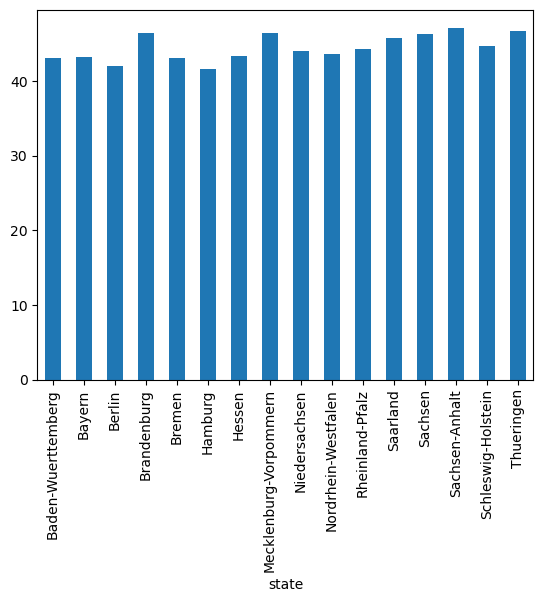

In [46]:

#avg age by state
demo_age=demo[['state','age_group','population']]
demo_age=demo_age.replace({'00-04':2, '05-14':9.5, '15-34':24.5, '35-59':47, '60-79':69.5, '80-99':89.5})

demo_age['a_pop']=demo_age['age_group']*demo_age['population']
total=demo.groupby('state')['population'].sum()


ave=demo_age.groupby('state')['a_pop'].sum()/total
ave.plot.bar()
# no significant difference

<AxesSubplot:xlabel='state'>

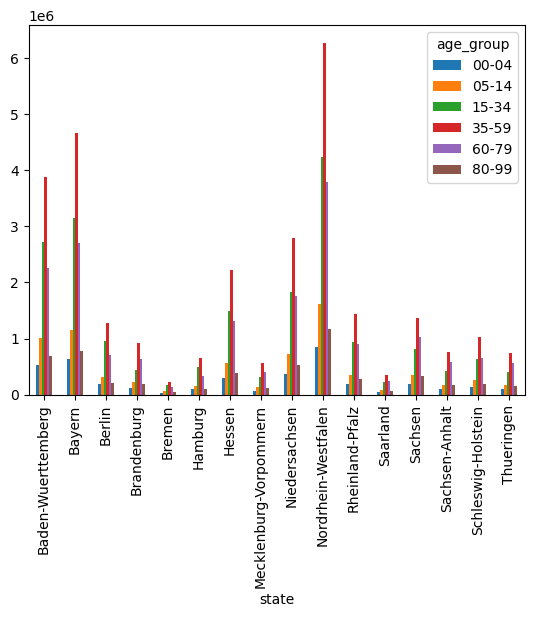

In [48]:
#Age representation per state
#demo.pivot_table(index="state", columns="age_group", values="population",aggfunc="sum").plot.bar()
demo.pivot_table(index="state", columns="age_group", values="population",aggfunc="sum").plot.bar()

## Vaccines analysis

### manufacturers

In [5]:
vaccines

,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul
date,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0
2020-12-28,18073,18073,0,42489,9,2,42500,0
2020-12-29,50229,50229,0,92717,9,3,92729,0
2020-12-30,64213,64213,0,156929,10,3,156942,0
2020-12-31,49985,49985,0,206912,12,3,206927,0
...,...,...,...,...,...,...,...,...
2023-01-18,15120,688,312,138014658,31577922,12803023,64866267,63553167
2023-01-19,16594,314,381,138015809,31577955,12803023,64866581,63553548
2023-01-20,10565,334,235,138016521,31578012,12803023,64866915,63553783


In [57]:
# Add colums with manufacturers - convert the cummulative sum into real values
vaccines['pfizer']=vaccines['pfizer_cumul'].diff().fillna(vaccines['pfizer_cumul'].iloc[0])
vaccines['moderna']=vaccines['moderna_cumul'].diff().fillna(vaccines['moderna_cumul'].iloc[0])
vaccines['astrazeneca']=vaccines['astrazeneca_cumul'].diff().fillna(vaccines['astrazeneca_cumul'].iloc[0])
vaccines.tail(10)
# df['salary'] = df['salary'].diff().fillna(df['salary'].iloc[0])
# >>> df

,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul,pfizer,moderna,astrazeneca,pfizer%,moderna%,astrazeneca%
date,,,,,,,,,,,,,,
2023-01-13,17508,371,342,138011328,31577742,12803023,64865053,63552354,1176.0,206.0,1.0,6.716929,1.176605,0.005712
2023-01-14,2901,63,68,138011559,31577752,12803023,64865116,63552422,231.0,10.0,0.0,7.962771,0.344709,0.000000
2023-01-15,1536,27,33,138011843,31577843,12803023,64865143,63552455,284.0,91.0,0.0,18.489583,5.924479,0.000000
2023-01-16,6997,134,148,138012394,31577873,12803023,64865277,63552603,551.0,30.0,0.0,7.874803,0.428755,0.000000
2023-01-17,14922,302,252,138013524,31577881,12803023,64865579,63552855,1130.0,8.0,0.0,7.572711,0.053612,0.000000
2023-01-18,15120,688,312,138014658,31577922,12803023,64866267,63553167,1134.0,41.0,0.0,7.500000,0.271164,0.000000
2023-01-19,16594,314,381,138015809,31577955,12803023,64866581,63553548,1151.0,33.0,0.0,6.936242,0.198867,0.000000
2023-01-20,10565,334,235,138016521,31578012,12803023,64866915,63553783,712.0,57.0,0.0,6.739233,0.539517,0.000000
2023-01-21,1395,45,19,138016565,31578013,12803023,64866960,63553802,44.0,1.0,0.0,3.154122,0.071685,0.000000


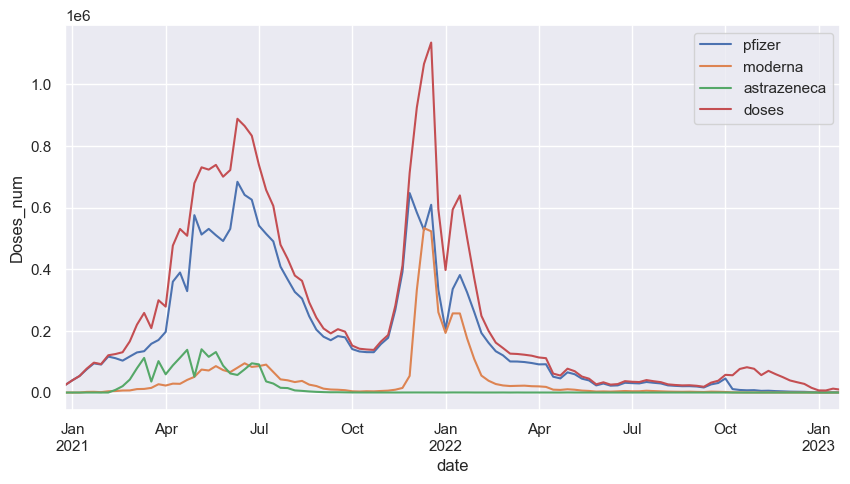

In [106]:
#What is the contribution of each manufacturer?
week_vac=vaccines.resample('W').mean()
week_vac[['pfizer', 'moderna','astrazeneca','doses']].plot(figsize=(10,5), ylabel="Doses_num")
plt.show()
#The most commony used manufacturer in Germany is pfizer
#Looks like there is other manufacturers present

In [96]:
#when all manufacturers sum to the daily doses number?
len(vaccines[vaccines['doses']==vaccines['pfizer']+vaccines['moderna']+vaccines['astrazeneca']].index)
#print(f'There are only {len(vaccines[vaccines['doses']==vaccines['pfizer']+vaccines['moderna']+vaccines['astrazeneca']].index)} days in thich all manufacturers sum to the daily doses number')
vaccines[vaccines['doses']==vaccines['pfizer']+vaccines['moderna']+vaccines['astrazeneca'] ].index

DatetimeIndex(['2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-03', '2021-01-05', '2021-01-06',
               '2021-01-08', '2021-01-09', '2021-01-11', '2021-01-13',
               '2021-01-14', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-22', '2021-01-23', '2021-01-25', '2021-01-26',
               '2021-01-28', '2021-02-04', '2021-02-09', '2021-02-25',
               '2021-02-26', '2021-03-01', '2021-03-02', '2021-03-04',
               '2021-03-06', '2021-03-07', '2021-03-09', '2021-03-11',
               '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16',
               '2021-03-18', '2021-03-19', '2021-03-20', '2021-03-22',
               '2021-04-03', '2021-04-05', '2021-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [88]:
vaccines['other']=vaccines['doses']-(vaccines['moderna']+vaccines['astrazeneca']+vaccines['pfizer'])
vaccines

,doses,doses_first,doses_second,doses_third,persons_full,persons_first_cumul,persons_full_cumul,pfizer_cumul,moderna_cumul,astrazeneca_cumul,pfizer,moderna,astrazeneca,pfizer%,moderna%,astrazeneca%,other
date,,,,,,,,,,,,,,,,,
2020-12-27,24427,24427,0,0,0.0,24427,0,24418,8,1,24418.0,8.0,1.0,99.963156,0.032751,0.004094,0.0
2020-12-28,18073,18073,0,0,0.0,42500,0,42489,9,2,18071.0,1.0,1.0,99.988934,0.005533,0.005533,0.0
2020-12-29,50229,50229,0,0,0.0,92729,0,92717,9,3,50228.0,0.0,1.0,99.998009,0.000000,0.001991,0.0
2020-12-30,64213,64213,0,0,0.0,156942,0,156929,10,3,64212.0,1.0,0.0,99.998443,0.001557,0.000000,0.0
2020-12-31,49985,49985,0,0,0.0,206927,0,206912,12,3,49983.0,2.0,0.0,99.995999,0.004001,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-18,15120,688,312,14120,312.0,64866267,63553167,138014658,31577922,12803023,1134.0,41.0,0.0,7.500000,0.271164,0.000000,13945.0
2023-01-19,16594,314,381,15899,381.0,64866581,63553548,138015809,31577955,12803023,1151.0,33.0,0.0,6.936242,0.198867,0.000000,15410.0
2023-01-20,10565,334,235,9996,235.0,64866915,63553783,138016521,31578012,12803023,712.0,57.0,0.0,6.739233,0.539517,0.000000,9796.0


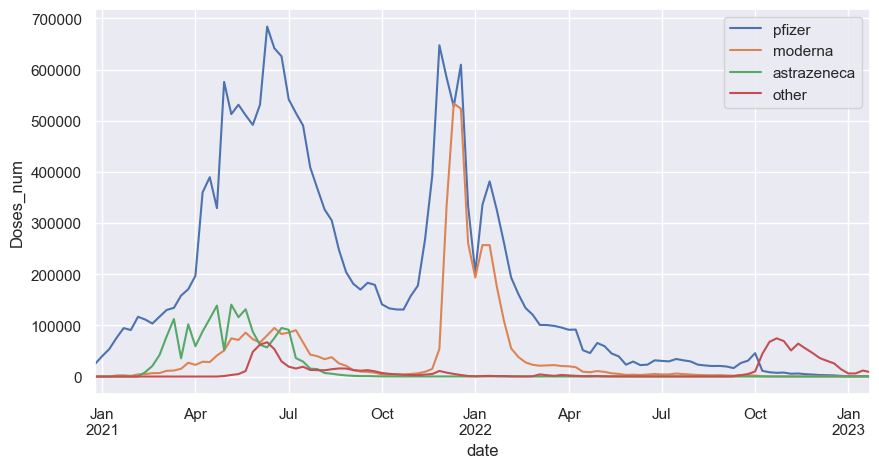

In [107]:
week_vac[['pfizer', 'moderna','astrazeneca','other']].plot(figsize=(10,5), ylabel="Doses_num")
plt.show()

In [97]:
#Percentage of each manufacturer
vaccines['pfizer%']=(vaccines['pfizer']/vaccines['doses'])*100
vaccines['moderna%']=(vaccines['moderna']/vaccines['doses'])*100
vaccines['astrazeneca%']=(vaccines['astrazeneca']/vaccines['doses'])*100
vaccines['other%']=(vaccines['other']/vaccines['doses'])*100
print(vaccines.shape)
vaccines.tail(10)
#df[percent] = (df['column_name'] / df['column_name'].sum()) * 100

(757, 18)


,doses,doses_first,doses_second,doses_third,persons_full,persons_first_cumul,persons_full_cumul,pfizer_cumul,moderna_cumul,astrazeneca_cumul,pfizer,moderna,astrazeneca,pfizer%,moderna%,astrazeneca%,other,other%
date,,,,,,,,,,,,,,,,,,
2023-01-13,17508,371,342,16795,342.0,64865053,63552354,138011328,31577742,12803023,1176.0,206.0,1.0,6.716929,1.176605,0.005712,16125.0,92.100754
2023-01-14,2901,63,68,2770,68.0,64865116,63552422,138011559,31577752,12803023,231.0,10.0,0.0,7.962771,0.344709,0.000000,2660.0,91.692520
2023-01-15,1536,27,33,1476,33.0,64865143,63552455,138011843,31577843,12803023,284.0,91.0,0.0,18.489583,5.924479,0.000000,1161.0,75.585938
2023-01-16,6997,134,148,6715,148.0,64865277,63552603,138012394,31577873,12803023,551.0,30.0,0.0,7.874803,0.428755,0.000000,6416.0,91.696441
2023-01-17,14922,302,252,14368,252.0,64865579,63552855,138013524,31577881,12803023,1130.0,8.0,0.0,7.572711,0.053612,0.000000,13784.0,92.373676
2023-01-18,15120,688,312,14120,312.0,64866267,63553167,138014658,31577922,12803023,1134.0,41.0,0.0,7.500000,0.271164,0.000000,13945.0,92.228836
2023-01-19,16594,314,381,15899,381.0,64866581,63553548,138015809,31577955,12803023,1151.0,33.0,0.0,6.936242,0.198867,0.000000,15410.0,92.864891
2023-01-20,10565,334,235,9996,235.0,64866915,63553783,138016521,31578012,12803023,712.0,57.0,0.0,6.739233,0.539517,0.000000,9796.0,92.721249
2023-01-21,1395,45,19,1331,19.0,64866960,63553802,138016565,31578013,12803023,44.0,1.0,0.0,3.154122,0.071685,0.000000,1350.0,96.774194


In [98]:
quarter_vac=vaccines.resample('Q').mean()
print(quarter_vac.shape)
quarter_vac


(10, 18)


,doses,doses_first,doses_second,doses_third,persons_full,persons_first_cumul,persons_full_cumul,pfizer_cumul,moderna_cumul,astrazeneca_cumul,pfizer,moderna,astrazeneca,pfizer%,moderna%,astrazeneca%,other,other%
date,,,,,,,,,,,,,,,,,,
2020-12-31,41385.400000,41385.400000,0.000000,0.000000,0.000000,1.047050e+05,0.000000e+00,1.046930e+05,9.600000e+00,2.400000e+00,41382.400000,2.400000,0.600000,99.988908,0.008768,0.002324,0.000000,0.000000
2021-03-31,155757.311111,108476.588889,47280.722222,0.000000,47280.722222,3.714193e+06,1.602089e+06,4.463370e+06,1.860254e+05,6.668206e+05,113831.900000,8220.788889,33703.255556,81.245627,4.056060,14.696867,1.366667,0.001446
2021-06-30,687195.175824,408058.373626,279069.879121,66.923077,297316.351648,2.963755e+07,1.306017e+07,3.108264e+07,3.136582e+06,7.550959e+06,505733.857143,63787.747253,95325.483516,71.354435,10.595636,15.268454,22348.087912,2.781475
2021-09-30,360120.271739,113590.782609,237337.608696,9191.880435,242030.478261,5.355268e+07,4.592094e+07,7.360293e+07,8.773203e+06,1.259018e+07,300779.771739,34052.010870,11566.510870,82.852990,10.046403,2.169435,13721.978261,4.931172
2021-12-31,479072.271739,56544.358696,58568.630435,363959.282609,60654.652174,5.983649e+07,5.629566e+07,9.584580e+07,1.263406e+07,1.277830e+07,327449.967391,147118.076087,142.239130,77.936795,19.867588,0.051182,4361.989130,2.144435
2022-03-31,270146.411111,20420.288889,43778.866667,205947.255556,43890.222222,6.406415e+07,6.185715e+07,1.249417e+08,2.878924e+07,1.279264e+07,186357.488889,82204.200000,136.266667,74.056338,24.568212,0.051689,1448.455556,1.323760
2022-06-30,51875.054945,1629.923077,3157.219780,47087.912088,3157.219780,6.468332e+07,6.328835e+07,1.334703e+08,3.103253e+07,1.280049e+07,44028.505495,7228.131868,53.153846,83.451306,14.878346,0.074084,565.263736,1.596264
2022-09-30,31535.739130,779.152174,1118.934783,29637.652174,1118.934783,6.478050e+07,6.345180e+07,1.362762e+08,3.143876e+07,1.280248e+07,26952.347826,3182.260870,5.271739,83.952192,12.159622,0.032148,1395.858696,3.856039
2022-12-31,49951.510870,537.195652,557.271739,48857.043478,557.271739,6.484387e+07,6.352970e+07,1.378470e+08,3.157215e+07,1.280294e+07,5130.630435,173.576087,3.434783,12.109349,0.730597,0.005211,44643.869565,87.154843


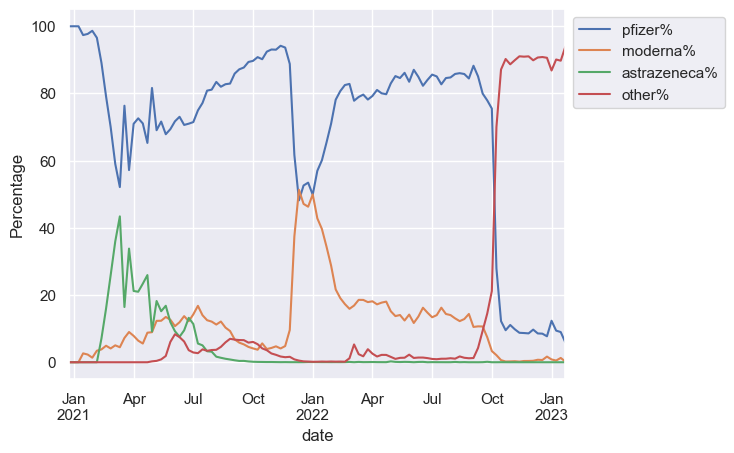

In [103]:

week_vac[['pfizer%', 'moderna%','astrazeneca%','other%']].plot(ylabel='Percentage')
plt.legend(bbox_to_anchor=(1.0, 1.0))
# In Jan 22 it was a reduction in pfizer use that was replaced by moderna
#astrazeneca was mainly used in the begining Feb-Jul 21 and abundunt afterwords. 

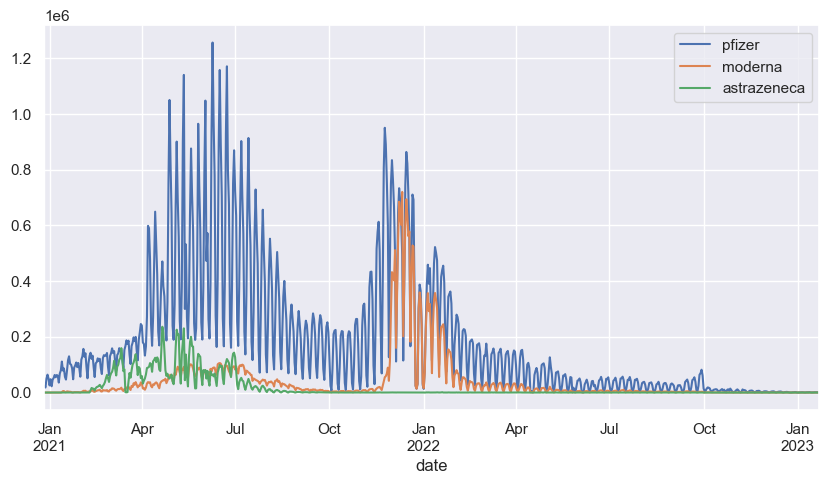

In [90]:
vaccines[['pfizer', 'moderna','astrazeneca']].plot(figsize=(10,5))
plt.show()

### Vaccination patterns

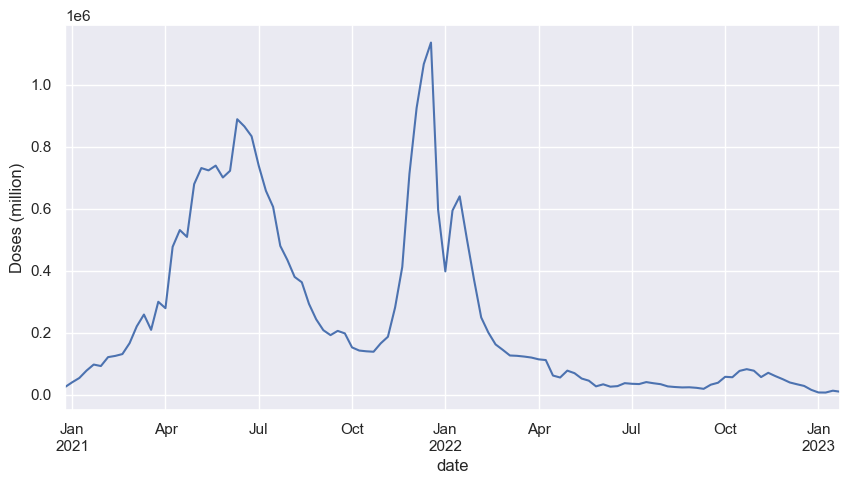

In [52]:
#Vaccination pattern
week_vac['doses'].plot(ylabel="Doses (million)", figsize=(10,5))
plt.show()


In [75]:
#when dose1+dose2 ==daily doses?
len(vaccines[vaccines['doses']==vaccines['doses_first']+vaccines['doses_second']].index)

155

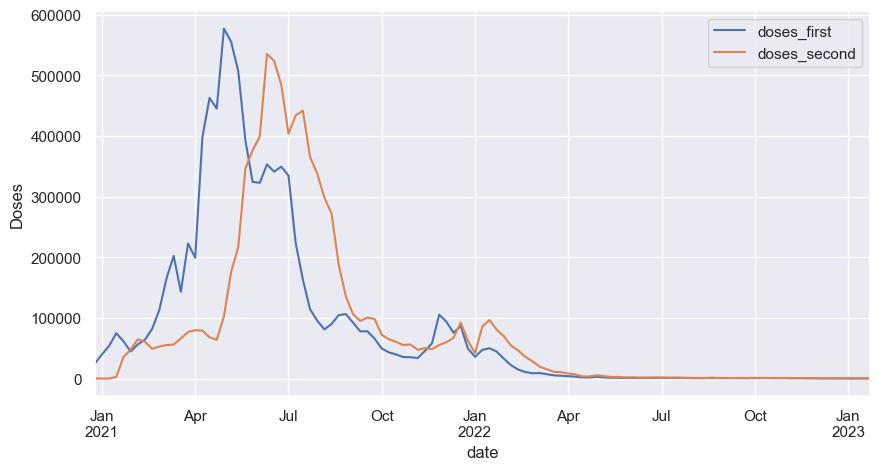

In [55]:
#First vs second dose pattern
week_vac[['doses_first', 'doses_second']].plot(ylabel="Doses", figsize=(10,5))
plt.show()

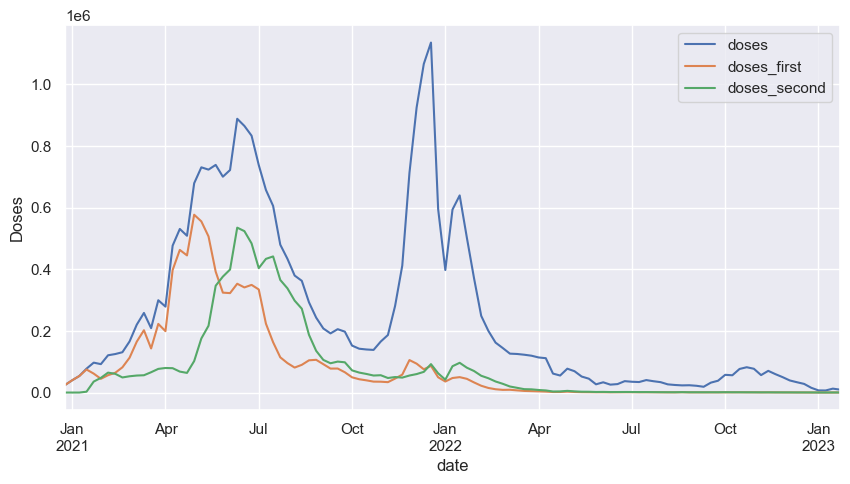

In [56]:
#total doses , first and second shot
week_vac[['doses', 'doses_first', 'doses_second']].plot(ylabel="Doses", figsize=(10,5))
plt.show()
#Is there a third one?

In [69]:
vaccines['persons_full']=vaccines['persons_full_cumul'].diff().fillna(vaccines['persons_full_cumul'].iloc[0])
vaccines

,doses,doses_first,doses_second,doses_third,persons_first_cumul,persons_full_cumul,pfizer_cumul,moderna_cumul,astrazeneca_cumul,pfizer,moderna,astrazeneca,pfizer%,moderna%,astrazeneca%,persons_full
date,,,,,,,,,,,,,,,,
2020-12-27,24427,24427,0,0,24427,0,24418,8,1,24418.0,8.0,1.0,99.963156,0.032751,0.004094,0.0
2020-12-28,18073,18073,0,0,42500,0,42489,9,2,18071.0,1.0,1.0,99.988934,0.005533,0.005533,0.0
2020-12-29,50229,50229,0,0,92729,0,92717,9,3,50228.0,0.0,1.0,99.998009,0.000000,0.001991,0.0
2020-12-30,64213,64213,0,0,156942,0,156929,10,3,64212.0,1.0,0.0,99.998443,0.001557,0.000000,0.0
2020-12-31,49985,49985,0,0,206927,0,206912,12,3,49983.0,2.0,0.0,99.995999,0.004001,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-18,15120,688,312,14120,64866267,63553167,138014658,31577922,12803023,1134.0,41.0,0.0,7.500000,0.271164,0.000000,312.0
2023-01-19,16594,314,381,15899,64866581,63553548,138015809,31577955,12803023,1151.0,33.0,0.0,6.936242,0.198867,0.000000,381.0
2023-01-20,10565,334,235,9996,64866915,63553783,138016521,31578012,12803023,712.0,57.0,0.0,6.739233,0.539517,0.000000,235.0


In [108]:
#persons_full= 2 doses of vaccine ( not 3)
vaccines['doses_third']=vaccines['doses']-(vaccines['doses_first']+vaccines['doses_second'])
new_cols=['doses', 'doses_first', 'doses_second', 'doses_third','persons_full', 'persons_first_cumul', 'persons_full_cumul',
          'pfizer_cumul', 'moderna_cumul','astrazeneca_cumul', 
       'pfizer', 'moderna', 'astrazeneca', 'other','pfizer%', 'moderna%','astrazeneca%','other%']
vaccines=vaccines.reindex(columns=new_cols)
vaccines.tail(10)

,doses,doses_first,doses_second,doses_third,persons_full,persons_first_cumul,persons_full_cumul,pfizer_cumul,moderna_cumul,astrazeneca_cumul,pfizer,moderna,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%
date,,,,,,,,,,,,,,,,,,
2023-01-13,17508,371,342,16795,342.0,64865053,63552354,138011328,31577742,12803023,1176.0,206.0,1.0,16125.0,6.716929,1.176605,0.005712,92.100754
2023-01-14,2901,63,68,2770,68.0,64865116,63552422,138011559,31577752,12803023,231.0,10.0,0.0,2660.0,7.962771,0.344709,0.000000,91.692520
2023-01-15,1536,27,33,1476,33.0,64865143,63552455,138011843,31577843,12803023,284.0,91.0,0.0,1161.0,18.489583,5.924479,0.000000,75.585938
2023-01-16,6997,134,148,6715,148.0,64865277,63552603,138012394,31577873,12803023,551.0,30.0,0.0,6416.0,7.874803,0.428755,0.000000,91.696441
2023-01-17,14922,302,252,14368,252.0,64865579,63552855,138013524,31577881,12803023,1130.0,8.0,0.0,13784.0,7.572711,0.053612,0.000000,92.373676
2023-01-18,15120,688,312,14120,312.0,64866267,63553167,138014658,31577922,12803023,1134.0,41.0,0.0,13945.0,7.500000,0.271164,0.000000,92.228836
2023-01-19,16594,314,381,15899,381.0,64866581,63553548,138015809,31577955,12803023,1151.0,33.0,0.0,15410.0,6.936242,0.198867,0.000000,92.864891
2023-01-20,10565,334,235,9996,235.0,64866915,63553783,138016521,31578012,12803023,712.0,57.0,0.0,9796.0,6.739233,0.539517,0.000000,92.721249
2023-01-21,1395,45,19,1331,19.0,64866960,63553802,138016565,31578013,12803023,44.0,1.0,0.0,1350.0,3.154122,0.071685,0.000000,96.774194


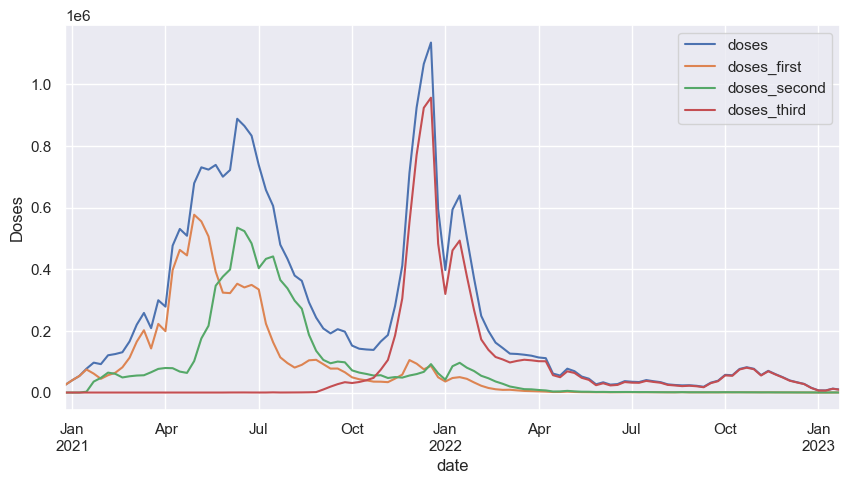

In [65]:
week_vac[['doses', 'doses_first', 'doses_second','doses_third']].plot(ylabel="Doses", figsize=(10,5))
plt.show()